<a href="https://colab.research.google.com/github/Soomin-Maxwell/Medical_AI_study/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCv


- cv2.imread : 이미지를 읽어 Numpy 객체로 만드는 함수 
- cv2.waitKey : 키보드 입력을 처리하는 함수 
- cv2.imshow : 특정한 이미지를 화면에 출력 
- cv2.imwrite(file_name, image) : 특정한 이미지를 파일로 저장하는 함수 


 


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Beautiful_image.jpeg to Beautiful_image.jpeg


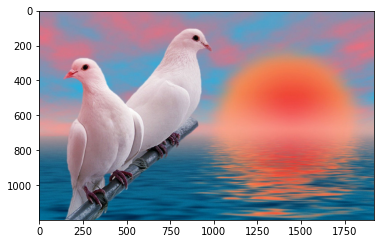

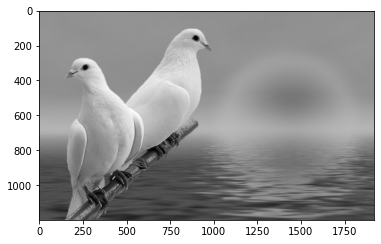

In [8]:
import cv2 
import matplotlib.pyplot as plt
import time

img_basic = cv2.imread('Beautiful_image.jpeg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv.COLOR_BGR2RGB))
plt.show()

img_gray = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))
plt.show()

In [9]:
image = img_basic
print(image.shape)  # height, width, ? 
print(image.size)  # size

(1200, 1920, 3)
6912000


In [10]:
px = image[1199,1919] # should not be 1200/1920 since it starts from 0
print(px) # B,G,R
print(px[2])

[131  96   0]
0


# Open CV 이미지 연산

In [11]:
image = cv2.imread("Beautiful_image.jpeg")

In [12]:
# 픽셀 수 및 이미지 크기 확인 
print(image.shape)
print(image.size)

(1200, 1920, 3)
6912000


In [16]:
# 이미지 Numpy 객체의 특정 픽셀을 가리킴 
px = image[100,100] 

# B,G,R 순서로 출력. (단, Gray Scale의 경우 B,G,R로 구분 되지 않음)
print(px)

# 각 B,G,R 출력
print(px[0])
print(px[1])
print(px[2])

[164 135 160]
164
135
160


OpenCV를 활용한 특정 범위 픽셀 변경 

---0.4038572311401367 seconds


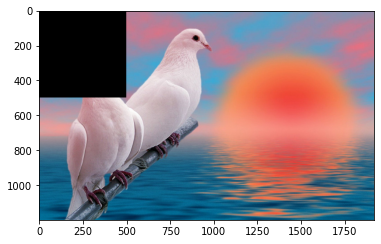



---0.002828836441040039 seconds


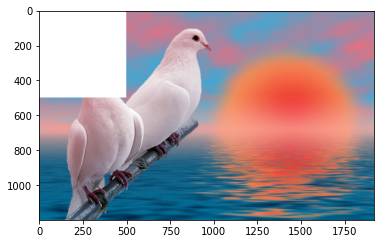

In [36]:
import cv2 
import matplotlib.pyplot as plt
import time

image = cv2.imread("Beautiful_image.jpeg")

start_time = time.time()

for i in range(0,500) :
  for j in range(0,500) :
    image[i,j] = [0,0,0]
print("---%s seconds" % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

print("\n")

start_time = time.time()
image[:500, 0:500] = [255,255,255] # Much faster 
print("---%s seconds" % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV를 활용한 ROI(Region of Interest : 관심있는 영역) 추출

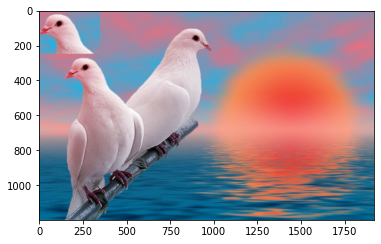

In [46]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("Beautiful_image.jpeg")

# Numpy Slicing : ROI 처리 기능 
roi = image[250:500,150:500]

# ROI 단위로 이미지 복사하기
image[0:250, 0:350] = roi 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


OpenCV를 활용한 픽셀별 색상 다루기 

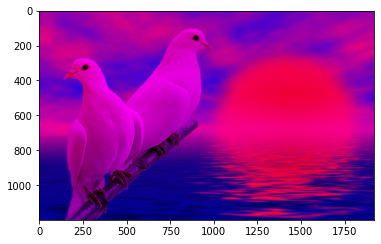

In [64]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("Beautiful_image.jpeg")
image[:, :, 1] = 0  #  B, G, R

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


# Open CV 이미지 변형

cv2.resize (image, dsize, fx, fy, interpolatioin) : 이미지의 크기를 조절 

- dsize : Manual Size 
- fx : 가로 비율 
- fy : 세로 비율 
- interpolation : 보간법

1) INTER_CUBIC : 사이즈를 크게 할 때 주로 사용 <br/>
2) INTER_AREA : 사이즈를 작게 할 때 주로 사용 <br/>

보간법은 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미함.


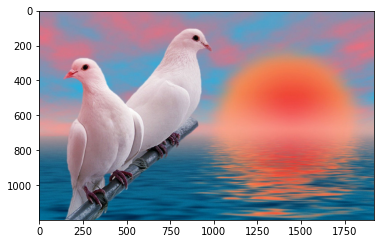

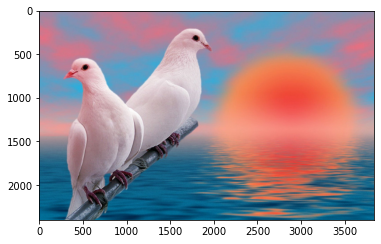

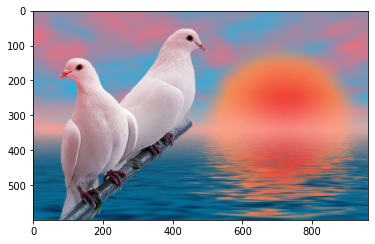

In [78]:
import cv2 
import matplotlib.pyplot as plt

image = cv2.imread("Beautiful_image.jpeg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image, None, fx =2.0, fy = 2.0, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()


shrink = cv2.resize(image, None, fx =0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

cv2.wrapAffine(image,M,dsize) : 이미지의 위치 변경
- M : 변환 행렬 
- dsize : Manual Size


(1200, 1920, 3)


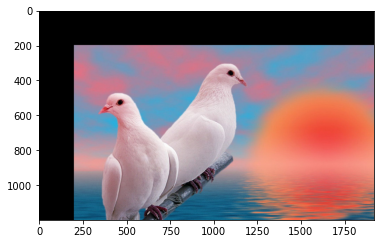

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Beautiful_image.jpeg')
print(image.shape)

# 행, 열 정보만 저장
height, width = image.shape[:2]

M = np.float32([[1,0,200], [0,1,200]])
dst = cv2.warpAffine(image, M, (width,height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

cv2.getRotationMatrix2D(center,angle,scale) : 이미지 회전을 위한 변환 행렬 생성

- center : 회전 중심
- angle : 회전 각도
- scale : Scale Factor 

600.0 960.0


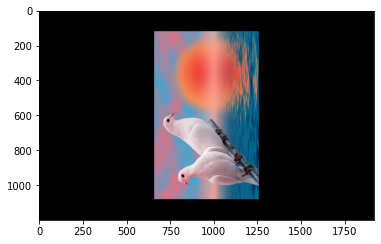

In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Beautiful_image.jpeg')

#행과 열 정보만 저장
height, width = image.shape[:2]
print(height/2,width/2)

M = cv2.getRotationMatrix2D((width/2 , height / 2), 90, 0.5 ) # center : x,y값 
dst = cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 이미지 합치기

cv2.add() : Saturation 연산을 수행 
- Saturation : 0 보다 작으면 0, 255보다 크면 255로 표현

np.add() : Modulo 연산을 수행
- Modulo : 256은 0, 257은 1로 표현


In [123]:
from google.colab import files 
uploaded = files.upload()

Saving image_1.jpeg to image_1.jpeg


In [124]:
from google.colab import files 
uploaded = files.upload()

Saving image_2.jpeg to image_2.jpeg


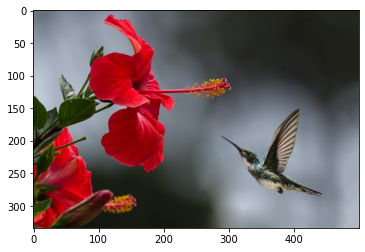

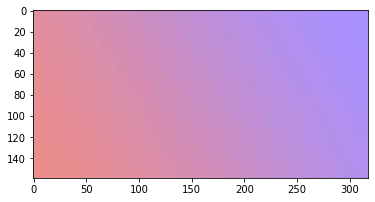

In [133]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread("image_1.jpeg")
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.show()

image_2 = cv2.imread("image_2.jpeg")
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()

In [138]:
print( image_2.shape[:2] )

(159, 318)


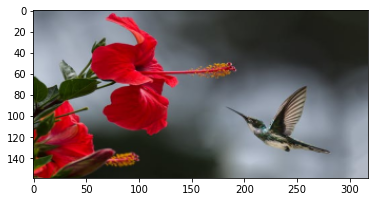

In [145]:
size = (318,159)
image_1_shrinked = cv2.resize(image_1, size, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(image_1_shrinked, cv2.COLOR_BGR2RGB))
plt.show()

(159, 318)
(159, 318)


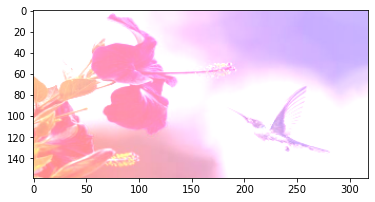

In [147]:
print( image_1_shrinked.shape[:2] )
print( image_2.shape[:2] )
result = cv2.add(shrink, image_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

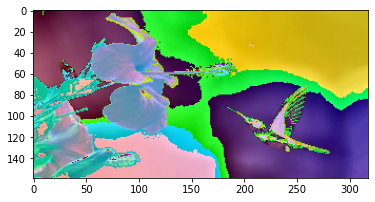

In [150]:
result = image_1_shrinked + image_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 임계점 처리하기

cv2.threshold(image,thresh,max_value,type) : 임계값을 기준으로 흑/백으로 분류하는 함수

- image : 처리할 Gray Scale 이미지 
- thresh : 임계값 (전체 픽셀에 적용)
- max_value : 임계값을 넘었을 때 적용할 값
- type : 임계점을 처리하는 방식

1) THRESH_BINARY : 임계값보다 크면 max_value, 작으면 0 <br/>
2) THRESH_BINARY_INV : 임계값보다 작으면 max_value, 크면 0 <br/>
3) THRESH_TRUNIC : 임계값보다 크면 임계값, 작으면 그대로  <br/>
4) THRESH_TOZERO : 임계값보다 크면 그대로, 작으면 0 <br/>
5) THRESH_TOZERO_INV : 임계값보다 크면 0, 작으면 그대로 <br/>

In [151]:
from google.colab import files
uploaded = files.upload()


Saving dog.jpeg to dog.jpeg


[[224 220 215 ... 205 202 201]
 [228 224 220 ... 206 203 201]
 [233 230 226 ... 207 204 202]
 ...
 [ 86  85  85 ...  77  73  69]
 [ 86  84  84 ...  77  73  69]
 [ 85  83  84 ...  77  73  69]]


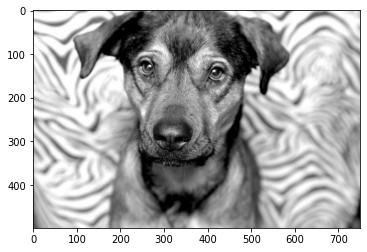

In [164]:
import cv2 
import matplotlib.pyplot as plt

# Original Image
img = cv2.imread("dog.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


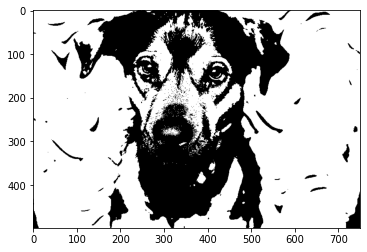

In [162]:
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
print(thres1)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


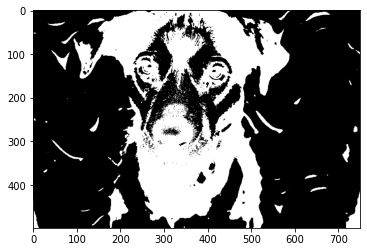

In [165]:
ret, thres2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
print(thres2)

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [ 86  85  85 ...  77  73  69]
 [ 86  84  84 ...  77  73  69]
 [ 85  83  84 ...  77  73  69]]


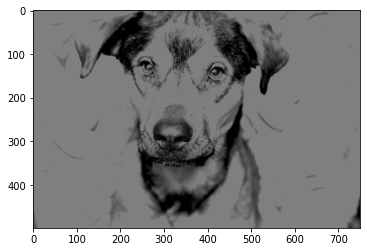

In [166]:
ret, thres3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
print(thres3)

[[224 220 215 ... 205 202 201]
 [228 224 220 ... 206 203 201]
 [233 230 226 ... 207 204 202]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


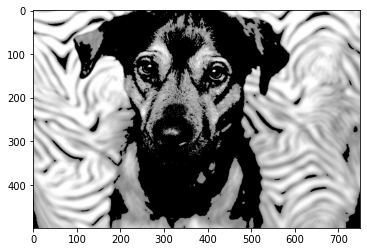

In [167]:
ret, thres4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(cv2.cvtColor(thres4, cv2.COLOR_GRAY2RGB))
print(thres4)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [86 85 85 ... 77 73 69]
 [86 84 84 ... 77 73 69]
 [85 83 84 ... 77 73 69]]


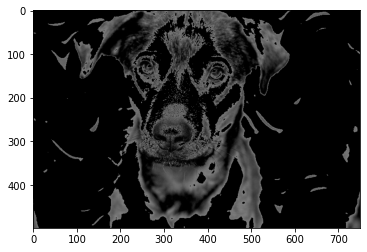

In [168]:
ret, thres5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(cv2.cvtColor(thres5, cv2.COLOR_GRAY2RGB))
print(thres5)

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size,C):적응 임계점 처리 함수 ) <br/>

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋다.
- max_value : 임계값을 넘었을 때 적용할 값
- adaptive_method : 임계값을 결정하는 계산 방법

1) ADAPTIVE_THRESH_MEAN_C : 주변 영역의 평균값으로 결정 <br/>
2) ADAPTIVE_THRESH_GAUSSIAN_C
- type : 임계점을 처리하는 방식
- block_size : 임계값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

Adaptive Threshold 를 이용하면, 전체 픽셀을 기준으로 임계값을 적용하지 않음.

In [171]:
from google.colab import files
uploaded = files.upload()

Saving Gogh_letter.jpeg to Gogh_letter.jpeg


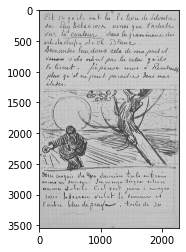

In [182]:
import cv2 

image = cv2.imread("Gogh_letter.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

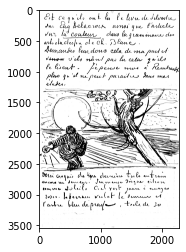

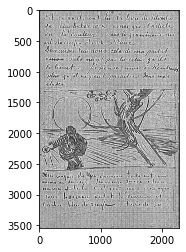

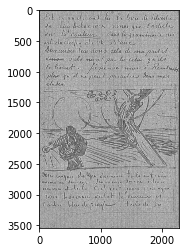

In [188]:
ret, thres1 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
plt.show()
